# SWOT denoising module: test Gaussian filter

* Emmanuel Cosme, 21/02/2018
* test the Gaussian filter

## Imports and input files

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

import SWOTdenoise as swotd
#filedir = '/Users/cosme/data/NATL60/MED-BOX/'
#filename = filedir+'MED_1km_nogap_FMA13_swotFastPhase_BOX_c01_p009.nc'
filedir = '/Users/cosme/data/NATL60/SWOT_fast_sampling_simulation_cycle1_passes/'
filename = filedir+'MED_fastPhase_1km_swotFAST_c01_p009.nc'

## 1. Read data and fill gap (for fancy plots)


In [2]:
ssh, lon, lat, x_ac, time = swotd.read_data(filename, 'SSH_obs', 'lon', 'lat', 'x_ac', 'time')
ssh_f, lon_f, lat_f, x_ac_f = swotd.fill_nadir_gap(ssh, lon, lat, x_ac, time)

//anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((19, 1342), -1.36e+09) will return an array of dtype('float32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


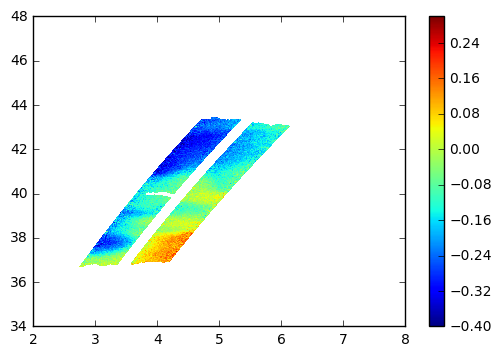

In [3]:
cs=plt.pcolormesh(lon_f, lat_f, ssh_f, vmin=-0.4, vmax=0.3)
#cs=plt.pcolormesh(lon, lat, ssh.mask)
plt.colorbar(cs)

## 2. Apply Gaussian filter without inpainting

In [4]:
ssh_out, lon_out, lat_out, x_ac_out, time_out = swotd.gaussian_filter(ssh, lon, lat, x_ac, time, 4.)

### Plot:

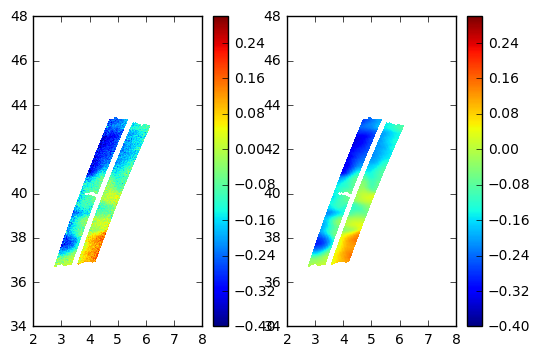

In [5]:
plt.subplot(1,2,1)
cs=plt.pcolormesh(lon_f, lat_f, ssh_f, vmin=-0.4, vmax=0.3)
plt.colorbar(cs)
plt.subplot(1,2,2)
cs=plt.pcolormesh(lon_out, lat_out, ssh_out, vmin=-0.4, vmax=0.3)
plt.colorbar(cs)

## 3. Apply Gaussian filter with inpainting of nadir gap

In [6]:
ssh_out, lon_out, lat_out, x_ac_out, time_out = swotd.gaussian_filter(ssh, lon, lat, x_ac, time, 4., inpainting=True)

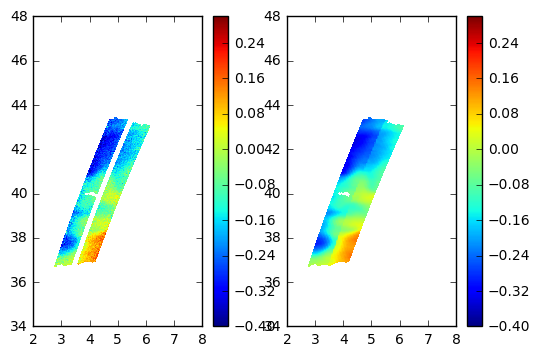

In [7]:
plt.subplot(1,2,1)
cs=plt.pcolormesh(lon_f, lat_f, ssh_f, vmin=-0.4, vmax=0.3)
plt.colorbar(cs)
plt.subplot(1,2,2)
cs=plt.pcolormesh(lon_out, lat_out, ssh_out, vmin=-0.4, vmax=0.3)
plt.colorbar(cs)